<a href="https://colab.research.google.com/github/SawantDisha/Google-Collab-Projects/blob/main/Object_Recognition_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


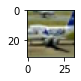

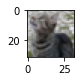

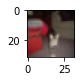

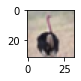

In [5]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train /= 255
X_test=X_test/255
n_classes = 10

In [8]:
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [9]:
#X_test = np.array(X_test)
#X_train = np.array(X_train)
#Y_test = np.array(Y_test)
#Y_train = np.array(Y_train)

In [10]:
model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 583s 1s/step - loss: 1.8345 - accuracy: 0.3147 - val_loss: 1.1082 - val_accuracy: 0.6100
Epoch 2/10
391/391 [==============================] - 570s 1s/step - loss: 1.1387 - accuracy: 0.5986 - val_loss: 0.9254 - val_accuracy: 0.6766
Epoch 3/10
391/391 [==============================] - 568s 1s/step - loss: 0.9287 - accuracy: 0.6745 - val_loss: 0.8337 - val_accuracy: 0.7099
Epoch 4/10
391/391 [==============================] - 566s 1s/step - loss: 0.8076 - accuracy: 0.7195 - val_loss: 0.7614 - val_accuracy: 0.7363
Epoch 5/10
391/391 [==============================] - 559s 1s/step - loss: 0.7208 - accuracy: 0.7478 - val_loss: 0.7044 - val_accuracy: 0.7550
Epoch 6/10
391/391 [==============================] - 551s 1s/step - loss: 0.6506 - accuracy: 0.7700 - val_loss: 0.6800 - val_accuracy: 0.7650
Epoch 7/10
391/391 [==============================] - 549s 1s/step - loss: 0.5908 - accuracy: 0.7952 - val_loss: 0.6695 - val_accuracy: 0.7658

In [12]:
classes = range(0, 10)

names = ['airplanr',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

    # zip the names and classes to make a dictionary of class_labels.
class_labels = dict(zip(classes, names))

    # generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

    # make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 592ms/step


In [13]:
print(predictions)

[[1.91407686e-04 1.40157699e-05 1.68146025e-02 2.85161119e-02
  3.45673651e-01 6.25675544e-02 1.20434421e-03 5.44808984e-01
  2.57092433e-05 1.83602911e-04]
 [8.60849832e-05 5.95833881e-05 2.87941955e-02 9.78629962e-02
  9.18582734e-03 7.86709428e-01 2.65684072e-02 5.00496849e-02
  3.32566648e-04 3.51227209e-04]
 [1.59861281e-06 3.94573726e-06 1.59214518e-03 7.50779081e-03
  2.34647654e-04 1.11253047e-03 9.89517391e-01 4.64262666e-06
  2.30157984e-05 2.29451962e-06]
 [1.72596316e-07 2.90887350e-08 2.26206012e-05 9.77850974e-01
  6.22481675e-05 1.63827476e-03 2.04218570e-02 2.16392732e-06
  1.26985086e-07 1.54348481e-06]
 [1.82283547e-05 9.88580287e-01 1.38588330e-09 1.34418796e-08
  4.70383121e-10 2.34317121e-09 3.22215232e-09 2.26226393e-09
  5.31581718e-05 1.13482475e-02]
 [5.69568783e-07 9.98297393e-01 1.35126882e-07 5.15035481e-08
  4.38357711e-10 3.38419213e-08 4.59860485e-06 1.12853255e-10
  5.46732568e-04 1.15052168e-03]
 [2.47181067e-03 5.31695696e-05 6.01620913e-01 1.82705760e

In [14]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0
1.0
0.99999994
1.0000001
0.99999994
0.99999994
1.0000001


In [15]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[7 5 6 3 1 1 2 6 8]


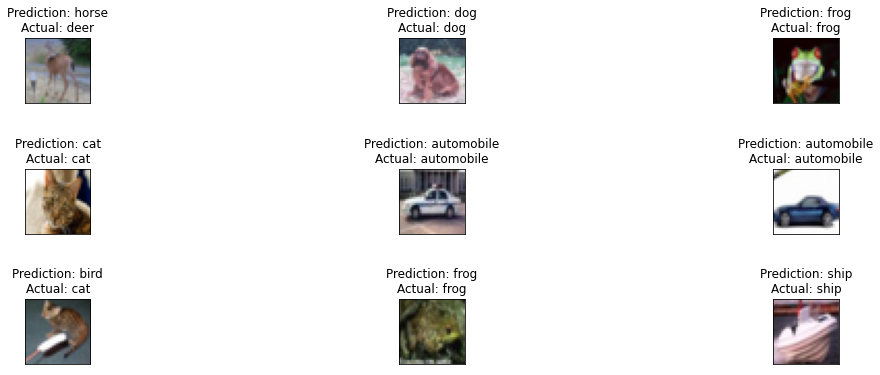

In [21]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # plot the image
  axs[i].imshow(img)

# show the plot
plt.show()